In [1]:
import urllib
# dartNumber = 21414
from bs4 import BeautifulSoup
# url = ("http://www.ndbc.noaa.gov/station_page.php?station={}".format(dartNumber) + 
#         "&type=0&startyear=2011&startmonth=02&startday=24&endyear=2011&endmonth=03&" + 
#         "endday=26&submit=Submit")
# sock = urllib.request.urlopen(url).read().decode("utf-8")

# soup = BeautifulSoup(sock, 'html.parser')

In [2]:
def getCoordinatesFromSoup(soup):
    #Find the "meta" with all coordinates

    for meta in soup.find_all('meta'):
        if 'name' in meta.attrs and meta.attrs['name'] =='description':break

    # Parse its content

    s = meta.attrs['content']
    n,e = s[s.find("(")+1:s.find(")")].split()
    n = float(n[:-1]) if n[-1] == 'N' else -float(n[:-1])
    e = float(e[:-1]) if e[-1] == 'E' else -float(e[:-1])
    return e,n

In [3]:
import os

In [4]:
def readAndWriteDARTBuoy(dartNumber):
    """
        Parses the online website info for the dart buoy,
        saves the time series to a file and returns its soup for further operations
    """
    import urllib
    from bs4 import BeautifulSoup
    url = ("http://www.ndbc.noaa.gov/station_page.php?station={}".format(dartNumber) + 
            "&type=0&startyear=2015&startmonth=09&startday=1&endyear=2015&endmonth=09&" + 
            "endday=30&submit=Submit")
    sock = urllib.request.urlopen(url).read().decode("utf-8")

    soup = BeautifulSoup(sock, 'html.parser')
    fileName = 'dart{}'.format(dartNumber)
        
    if (len(soup.textarea.contents)>0):
    
        f = open(fileName,'w')
        f.write(soup.textarea.contents[0])
        f.close()
    else:
        print('\n\n\n no data in contents \n\n\n\n')
    
    
    
    print(os.popen('head '+fileName).read())
    
    return soup

* 21401 has contents with len = 0
* 55012, 32413 have contents but only header


In [5]:
DARTs = [21414, 21419, 21418, 21413, 52403, 52406, 51425, 51407,
        46404, 46407, 46411, 46412, 43412, 43413, 32411, 32412,32401]

In [6]:
coordinates = {}

In [7]:
for dartNumber in DARTs:
    print(dartNumber)
    soup = readAndWriteDARTBuoy(dartNumber)
    coordinates[dartNumber]  = getCoordinatesFromSoup(soup)

21414
#YY  MM DD hh mm ss T   HEIGHT
#yr  mo dy hr mn  s -      m
2015 09 30 23 45 00 1 5467.618
2015 09 30 23 30 00 1 5467.597
2015 09 30 23 15 00 1 5467.579
2015 09 30 23 00 00 1 5467.560
2015 09 30 22 45 00 1 5467.544
2015 09 30 22 30 00 1 5467.528
2015 09 30 22 15 00 1 5467.515
2015 09 30 22 00 00 1 5467.503

21419
#YY  MM DD hh mm ss T   HEIGHT
#yr  mo dy hr mn  s -      m
2015 09 30 23 45 00 1 5294.583
2015 09 30 23 30 00 1 5294.605
2015 09 30 23 15 00 1 5294.629
2015 09 30 23 00 00 1 5294.656
2015 09 30 22 45 00 1 5294.687
2015 09 30 22 30 00 1 5294.717
2015 09 30 22 15 00 1 5294.748
2015 09 30 22 00 00 1 5294.777

21418
#YY  MM DD hh mm ss T   HEIGHT
#yr  mo dy hr mn  s -      m
2015 09 30 23 45 00 1 5690.804
2015 09 30 23 30 00 1 5690.834
2015 09 30 23 15 00 1 5690.865
2015 09 30 23 00 00 1 5690.895
2015 09 30 22 45 00 1 5690.931
2015 09 30 22 30 00 1 5690.963
2015 09 30 22 15 00 1 5690.995
2015 09 30 22 00 00 1 5691.031

21413
#YY  MM DD hh mm ss T   HEIGHT
#yr  mo dy hr mn  

In [8]:
for k in coordinates.keys():
    print('{}: {{location:[{},{}]}},'.format("'"+str(k)+"'",coordinates[k][0]%360,coordinates[k][1]))

'21414': {location:[178.219,48.968]},
'21419': {location:[155.717,44.435]},
'21418': {location:[148.645,38.727]},
'21413': {location:[152.132,30.533]},
'52403': {location:[145.52,4.02]},
'52406': {location:[164.977,-5.307]},
'51425': {location:[183.68,-9.517]},
'51407': {location:[203.455,19.57]},
'46404': {location:[231.267,45.853]},
'46407': {location:[231.168,42.682]},
'46411': {location:[232.933,39.333]},
'46412': {location:[239.437,32.492]},
'43412': {location:[253.03300000000002,16.045]},
'43413': {location:[259.91700000000003,11.012]},
'32411': {location:[269.12,4.953]},
'32412': {location:[273.626,-17.984]},
'32401': {location:[286.579,-20.474]},


In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

21414
21419
21418
21413
52403
52406
51425
51407
46404
46407
46411
46412
43412
43413
32411
32412
32401


[]

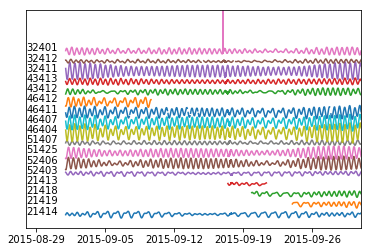

In [10]:
for i,dartNumber in enumerate(DARTs):
    print(dartNumber)
    params = {
        'filepath_or_buffer': 'dart{}'.format(dartNumber),
        'skiprows': 2,
        'delim_whitespace': True,
        'names' : 'year month day hour minute second T height'.split(),
        'na_values': 9999
    }
    df = pd.read_csv(**params)
    df['date'] = pd.to_datetime(df['year month day hour minute second'.split()])
    df = df['date height'.split()]

    plt.plot(df['date'],df['height']-df['height'].mean()+i*1.5)
    plt.text(df['date'].min()-pd.Timedelta(days=4),i*1.5,'{}'.format(dartNumber))
plt.ylim(-2,30)
plt.xlim(df['date'].min()-pd.Timedelta(days=4), df['date'].max())
plt.gca().set_yticks([])

# Plot on map

In [11]:
z = np.fromfile('bathymetry')

z[0],z[1]
z = np.reshape(z[2:],(int(z[0]),int(z[1])))

In [19]:
ncols,nrows = z.shape
xll = 135.0
yll = -35.0
cell = 1/60*3
xur = xll + (nrows-1)*cell
yur = yll + (ncols-1)*cell

In [20]:
x = np.linspace(xll,xur,nrows)
y = np.linspace(yll,yur,ncols)

In [21]:
coordinates

{21413: (152.132, 30.533),
 21414: (178.219, 48.968),
 21418: (148.645, 38.727),
 21419: (155.717, 44.435),
 32401: (-73.421, -20.474),
 32411: (-90.88, 4.953),
 32412: (-86.374, -17.984),
 43412: (-106.967, 16.045),
 43413: (-100.083, 11.012),
 46404: (-128.733, 45.853),
 46407: (-128.832, 42.682),
 46411: (-127.067, 39.333),
 46412: (-120.563, 32.492),
 51407: (-156.545, 19.57),
 51425: (-176.32, -9.517),
 52403: (145.52, 4.02),
 52406: (164.977, -5.307)}

In [22]:
60/1801*60

1.9988895058300944

In [23]:
x,y

(array([ 135.  ,  135.05,  135.1 , ...,  289.9 ,  289.95,  290.  ]),
 array([-35.  , -34.95, -34.9 , ...,  49.9 ,  49.95,  50.  ]))

In [24]:
ncols

1701

(135.0, 290.0, -35.0, 54.397774172185443)

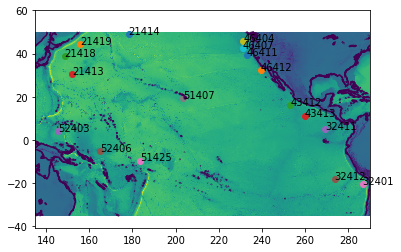

In [25]:
plt.pcolormesh(x,y,z)
plt.contour(x,y,z,[0.0])
for k in coordinates.keys():
#     if coordinates[k][0]>0:
        plt.scatter(coordinates[k][0] % 360,coordinates[k][1])
        plt.text(coordinates[k][0] % 360,coordinates[k][1],'{}'.format(k),color='k')
plt.axis('equal')